[![runpod](https://img.shields.io/badge/RunPod-tested-sucess?logo=DPD&labelColor=673ab7)](https://runpod.io?ref=km0th85l)

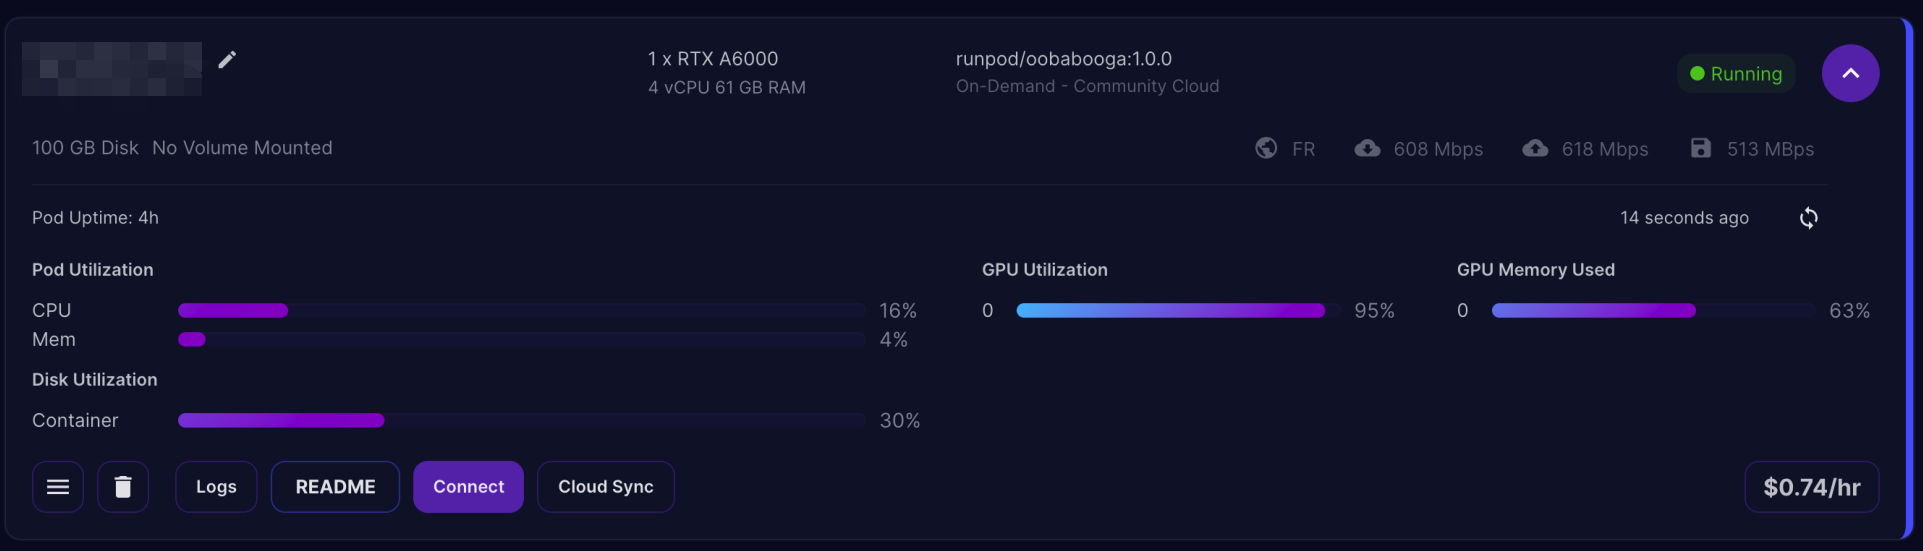

based on https://colab.research.google.com/drive/1wfrKqyPkz5BGD1Gkij_cvbUeweIDdRav?usp=sharing 

In [1]:
!git clone https://github.com/PhoebusSi/Alpaca-CoT.git code

Cloning into 'code'...
remote: Enumerating objects: 750, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 750 (delta 47), reused 28 (delta 16), pack-reused 664
Receiving objects: 100% (750/750), 127.12 MiB | 16.22 MiB/s, done.
Resolving deltas: 100% (401/401), done.


In [2]:
# install basic python package
# 安装必要的python库
!python -m pip install bitsandbytes
!python -m pip install datasets
!python -m pip install git+https://github.com/huggingface/transformers.git
!python -m pip install peft
!python -m pip install sentencepiece
!python -m pip install gradio


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-w7rcp87u
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-w7rcp87u
  Resolved https://github.com/huggingface/transformers.git to commit abbc96a2148da0c91fa078bd021984b2cc10ef85
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.29.0.dev0-py3-none-any.whl size=6929166 sha256=2b2f738ad74a9abef609bb009f6f2e1ed9accb56c423b2b7c56056b72106beba
  Stored in directory: /tmp/pip-ephem-wheel-cache-p8msirxh/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c

In [3]:
# download data git repository
# 拉取数据仓库
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datasets/QingyiSi/Alpaca-CoT data

Cloning into 'data'...
remote: Enumerating objects: 2167, done.
remote: Counting objects: 100% (2160/2160), done.
remote: Compressing objects: 100% (1971/1971), done.
remote: Total 2167 (delta 145), reused 2055 (delta 133), pack-reused 7
Receiving objects: 100% (2167/2167), 21.86 MiB | 18.96 MiB/s, done.
Resolving deltas: 100% (145/145), done.


In [5]:
# pull specify data and move it，change <alpaca/> to your preference
# 从仓库中拉取指定文件放入训练目录下，你可以在 https://huggingface.co/datasets/QingyiSi/Alpaca-CoT 查看数据详情
!cd /workspace/data && git config core.sparsecheckout true && git config lfs.fetchinclude alpaca/
!cd /workspace/data && git lfs pull
!cp /workspace/data/alpaca/*.json /workspace/code/data/
!ls -lh /workspace/code/data/

total 44Mng LFS objects: 100% (2/2), 46 MB | 20 MB/s                            
-rw-r--r-- 1 root root  22M Apr 17 13:56 alpaca_data.json
-rw-r--r-- 1 root root  22M Apr 17 13:56 alpaca_data_cleaned.json
drwxr-xr-x 2 root root 4.0K Apr 17 13:54 formatted_cot_data
drwxr-xr-x 2 root root 4.0K Apr 17 13:54 origin_cot_data


In [6]:
# instruction finetuning 
# 进行指令微调，如果你想直接体验已有checkpoint，可忽略此步
!cd /workspace/code && python uniform_finetune.py --model_type llama --model_name_or_path decapoda-research/llama-7b-hf --data alpaca --lora_target_modules q_proj v_proj --per_gpu_train_batch_size 4 --learning_rate 3e-4 --epochs 1 


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda116.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib'), PosixPath('/usr/local/nvidia/lib64')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following di